In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [4]:
df['month_no'] = pd.to_datetime(df['job_posted_date']).dt.month

In [52]:
df_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_IN_exploded = df_IN.explode('job_skills')
df_IN_pivot = df_IN_exploded.pivot_table(index='month_no',columns='job_skills', aggfunc='size', fill_value=0)
df_IN_pivot.loc['Total'] = df_IN_pivot.sum()
df_IN_pivot_sorted = df_IN_pivot[df_IN_pivot.loc['Total'].sort_values(ascending=False).index]
df_IN_pivot_sorted = df_IN_pivot_sorted.drop('Total')

In [53]:
df_total = df_IN.groupby('month_no').size()
df_IN_pivot_sorted = df_IN_pivot_sorted.div(df_total/100,axis=0)

df_IN_pivot_sorted = df_IN_pivot_sorted.reset_index()

df_IN_pivot_sorted['month'] = df_IN_pivot_sorted['month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')
)

df_IN_pivot_sorted = df_IN_pivot_sorted.set_index('month')
df_IN_pivot_sorted = df_IN_pivot_sorted.drop(columns='month_no')


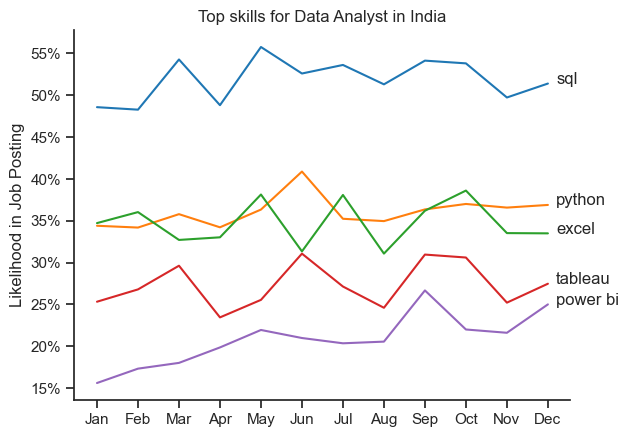

In [69]:
df_plot = df_IN_pivot_sorted.iloc[:,:5]
sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top skills for Data Analyst in India')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])

plt.show()